In [1]:
!pip install pandas_datareader

In [2]:
import math
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("BTC-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2643.000000,2.643000e+03,2643.000000,2643.000000,2643.000000,2.643000e+03
mean,10517.133023,1.290875e+04,10198.737320,10532.285425,10532.285425,1.421616e+10
std,15487.825052,1.099530e+05,14992.172821,15497.434904,15497.434904,1.994710e+10
min,176.897003,2.117310e+02,171.509995,178.102997,178.102997,5.914570e+06
25%,587.709503,5.952535e+02,582.722473,588.460510,588.460510,7.626140e+07
50%,5938.250000,6.194880e+03,5785.004395,5982.457520,5982.457520,4.847965e+09
75%,10130.225586,1.031331e+04,9752.528809,10134.783203,10134.783203,2.347802e+10
max,67549.734375,5.604063e+06,66382.062500,67566.828125,67566.828125,3.509679e+11


In [5]:
# see data types, number of rows,d and null information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2647 non-null   object 
 1   Open       2643 non-null   float64
 2   High       2643 non-null   float64
 3   Low        2643 non-null   float64
 4   Close      2643 non-null   float64
 5   Adj Close  2643 non-null   float64
 6   Volume     2643 non-null   float64
dtypes: float64(6), object(1)
memory usage: 144.9+ KB


In [6]:
# define the shape of the dataframe

df.shape

(2647, 7)

In [7]:
# find out exactly how many nulls there are

df.isna().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [8]:
# drop nulls (if any)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 2646
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2643 non-null   object 
 1   Open       2643 non-null   float64
 2   High       2643 non-null   float64
 3   Low        2643 non-null   float64
 4   Close      2643 non-null   float64
 5   Adj Close  2643 non-null   float64
 6   Volume     2643 non-null   float64
dtypes: float64(6), object(1)
memory usage: 165.2+ KB


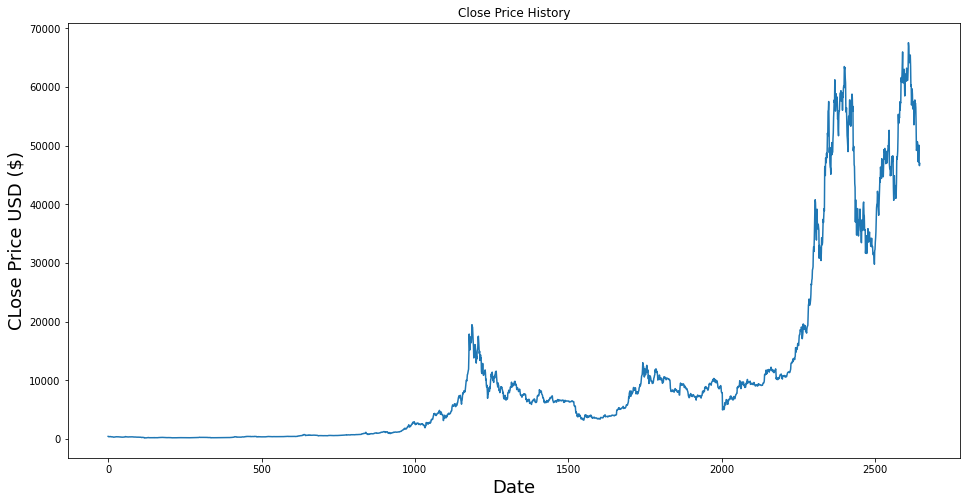

In [9]:
# Visualize  the closing price history

plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLose Price USD ($)', fontsize=18)
plt.show()

In [10]:
# Create a new df with only the "Close" column

data = df.filter(['Close'])

# Convert the df to a np array

dataset = data.values

# Get the number of rows to train the model on

training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2115

In [11]:
# scale the data

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.69090753],
       [0.68905488],
       [0.69445   ]])

In [12]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.003112968699163547]



In [13]:

# Convert the x_train and y_train to np arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2055, 60, 1)

In [15]:
# build LSTM model

model = keras.Sequential()

model.add(layers.LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(50, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

In [16]:
# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Train the model

model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2055/2055 [==============================] - 29s 13ms/step - loss: 4.2812e-04
Epoch 2/3
2055/2055 [==============================] - 27s 13ms/step - loss: 1.0479e-04
Epoch 3/3
2055/2055 [==============================] - 27s 13ms/step - loss: 7.3790e-05


In [18]:
# Create testing data set

# Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test

x_test = []
y_test = dataset[training_data_len: ,  :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [19]:
# convert the data into a np array

x_test = np.array(x_test)

In [20]:
# Reshape the data

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
# Get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
predictions

array([[ 9356.073 ],
       [ 9308.923 ],
       [ 9312.333 ],
       [ 9285.277 ],
       [ 9445.421 ],
       [ 9464.475 ],
       [ 9558.602 ],
       [ 9518.329 ],
       [ 9484.612 ],
       [ 9447.008 ],
       [ 9451.4375],
       [ 9439.851 ],
       [ 9433.803 ],
       [ 9403.168 ],
       [ 9352.415 ],
       [ 9339.718 ],
       [ 9343.652 ],
       [ 9363.616 ],
       [ 9361.919 ],
       [ 9481.046 ],
       [ 9633.519 ],
       [ 9734.957 ],
       [ 9745.015 ],
       [ 9817.754 ],
       [ 9987.073 ],
       [10705.774 ],
       [11030.086 ],
       [11229.843 ],
       [11297.04  ],
       [11428.156 ],
       [11744.643 ],
       [11481.457 ],
       [11418.77  ],
       [11390.54  ],
       [11707.207 ],
       [11904.508 ],
       [11871.922 ],
       [11921.1045],
       [11902.543 ],
       [12007.118 ],
       [11788.635 ],
       [11764.76  ],
       [11895.1   ],
       [11961.744 ],
       [12042.002 ],
       [12092.813 ],
       [12324.241 ],
       [12283

In [23]:
# Get the root mean squared error (RMSE)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

736.6114502716615

<ipython-input-24-c74ed63cabc2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicitons'] = predictions


<function matplotlib.pyplot.show(close=None, block=None)>

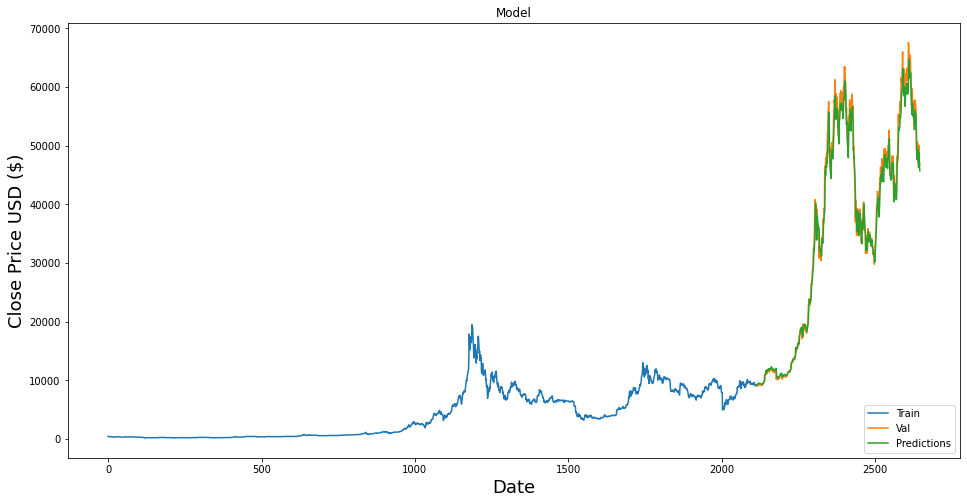

In [24]:
# Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicitons'] = predictions

# Visualize the data

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predicitons']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show

In [25]:
valid

,Close,Predicitons
2116,9087.303711,9356.073242
2117,9132.488281,9308.922852
2118,9073.942383,9312.333008
2119,9375.474609,9285.277344
2120,9252.277344,9445.420898
...,...,...
2642,49362.507813,46312.523438
2643,50098.335938,47644.250000
2644,46737.480469,48801.726562
2645,46612.632813,46707.050781
